In [1]:
from google.colab import files
uploaded = files.upload()

Saving Invistico_Airline.csv.zip to Invistico_Airline.csv.zip


In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

In [3]:
with zipfile.ZipFile('Invistico_Airline.csv.zip')as z:
  with z.open('Invistico_Airline.csv')as f:
    flight_df = pd.read_csv(f)

    flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

# **2. Exploratory Analysis**

## **Handling Mssing Values**

The dataset contains a total of 129,880 records with 28 columns.One column **Arrival Delay in Minutes**, contains mssing values; specifically, 393 rows lack data. This presence of missing values in this column likely indicates that the  data was not recorded, or that the flight were either canceled or departed earlier then scheduled.

After a review the dataset, I found that the percentage of missing data is minimal and does not appear to have a signifcant impact. Therefore, I chose to drop all rows containing missing values. This decision supports a cleaner approach for conducting both exploratory and highter-level analyses.

In [4]:
flight_df = flight_df.dropna(subset=['Arrival Delay in Minutes'])
flight_df.reset_index(drop=True, inplace=True)

flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

In [5]:
flight_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
print(flight_df.columns)


Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


#**Correlation Heatmap (Between Continuous Variables)**

This heatmap visualizes the linear relationships between all continuous variables. To better understand the insights, I break it down by examining the strong and weak correlations.

# **Strong positive correlations (closer to 1.0):**
1. **Departure delay in minutes <-----> Arrival Delay in minutes**
  * Flights that depart late are almost always delayed on arrival.
2.**Inflight wifi service <------> inflight entertainment**
  * Passengers who rated Wi-Fi high also tend to rate enterainment high.
3. **Seat comfort <-----> Food and Drink**
  * Passengers who find their seat comfortable tend to rate food and drinks higher as well.
4. **Ease of Online Booking  <----> Online Support**
  * This strong relationship may exist because a smooth online experience often reflects on both booking and the support provided during the process.

#**Weak correlations (closer to 0):**
* **Age and Gate Location**
This is a weak correlation becuause neither variabl affects or influences the passengers satisfaction.

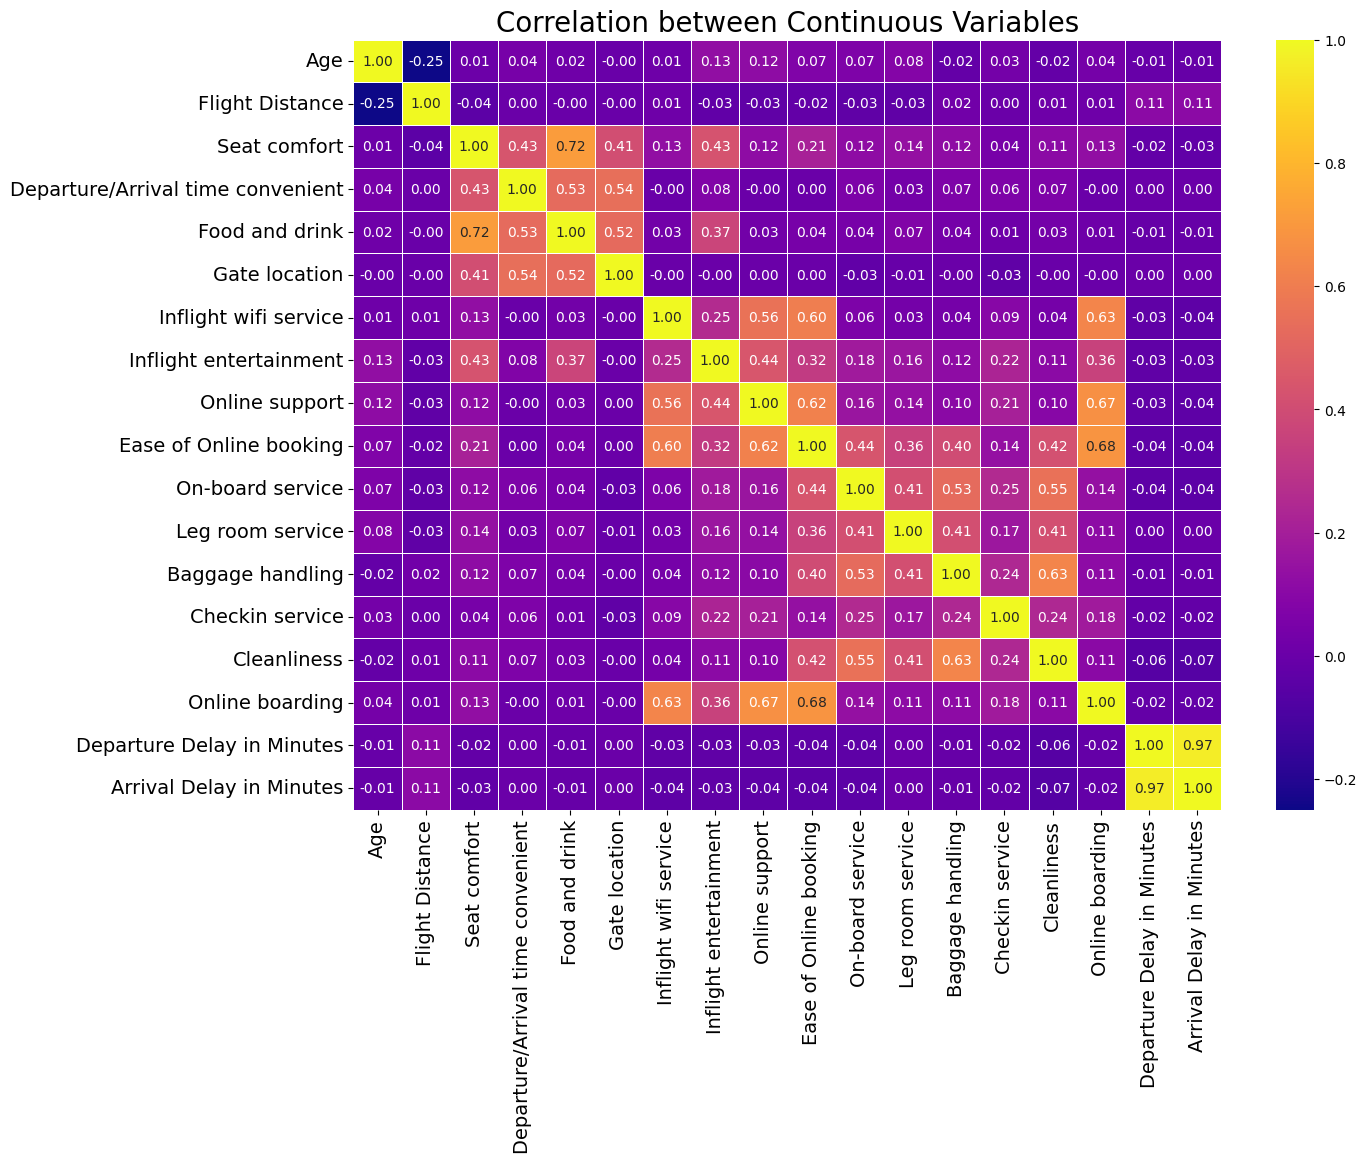

In [7]:
flight_corr_df = flight_df[['Age','Flight Distance','Seat comfort', 'Departure/Arrival time convenient','Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']]
flight_corr_df.head()
plt.figure(figsize=(14,10))
sns.heatmap(flight_corr_df.corr(), annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Continuous Variables', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



In [8]:
corr_matrix = flight_corr_df.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

corr_pairs = corr_pairs.drop_duplicates().sort_values()


In [9]:
weak_corrs = corr_pairs[(corr_pairs > -0.3) & (corr_pairs < 0.3)].sort_values()
print("\nWeak Correlations")
display(weak_corrs)


Weak Correlations


Age                     Flight Distance              -0.249438
Cleanliness             Arrival Delay in Minutes     -0.067208
                        Departure Delay in Minutes   -0.062018
Flight Distance         Seat comfort                 -0.042476
On-board service        Arrival Delay in Minutes     -0.041456
                                                        ...   
Inflight entertainment  Checkin service               0.224130
Baggage handling        Checkin service               0.241203
Checkin service         Cleanliness                   0.241943
On-board service        Checkin service               0.251037
Inflight wifi service   Inflight entertainment        0.253941
Length: 125, dtype: float64

In [10]:
strong_positive_corrs = corr_pairs[(corr_pairs > 0.5) & (corr_pairs < 1.0)].sort_values(ascending=False)
print("Strong Correlations")
display(strong_positive_corrs)

Strong Correlations


Departure Delay in Minutes         Arrival Delay in Minutes    0.965291
Seat comfort                       Food and drink              0.716008
Ease of Online booking             Online boarding             0.684329
Online support                     Online boarding             0.669886
Baggage handling                   Cleanliness                 0.632047
Inflight wifi service              Online boarding             0.631800
Online support                     Ease of Online booking      0.617642
Inflight wifi service              Ease of Online booking      0.601074
                                   Online support              0.557548
On-board service                   Cleanliness                 0.551137
Departure/Arrival time convenient  Gate location               0.544311
On-board service                   Baggage handling            0.530591
Departure/Arrival time convenient  Food and drink              0.527575
Food and drink                     Gate location               0.523530
dtype: float64

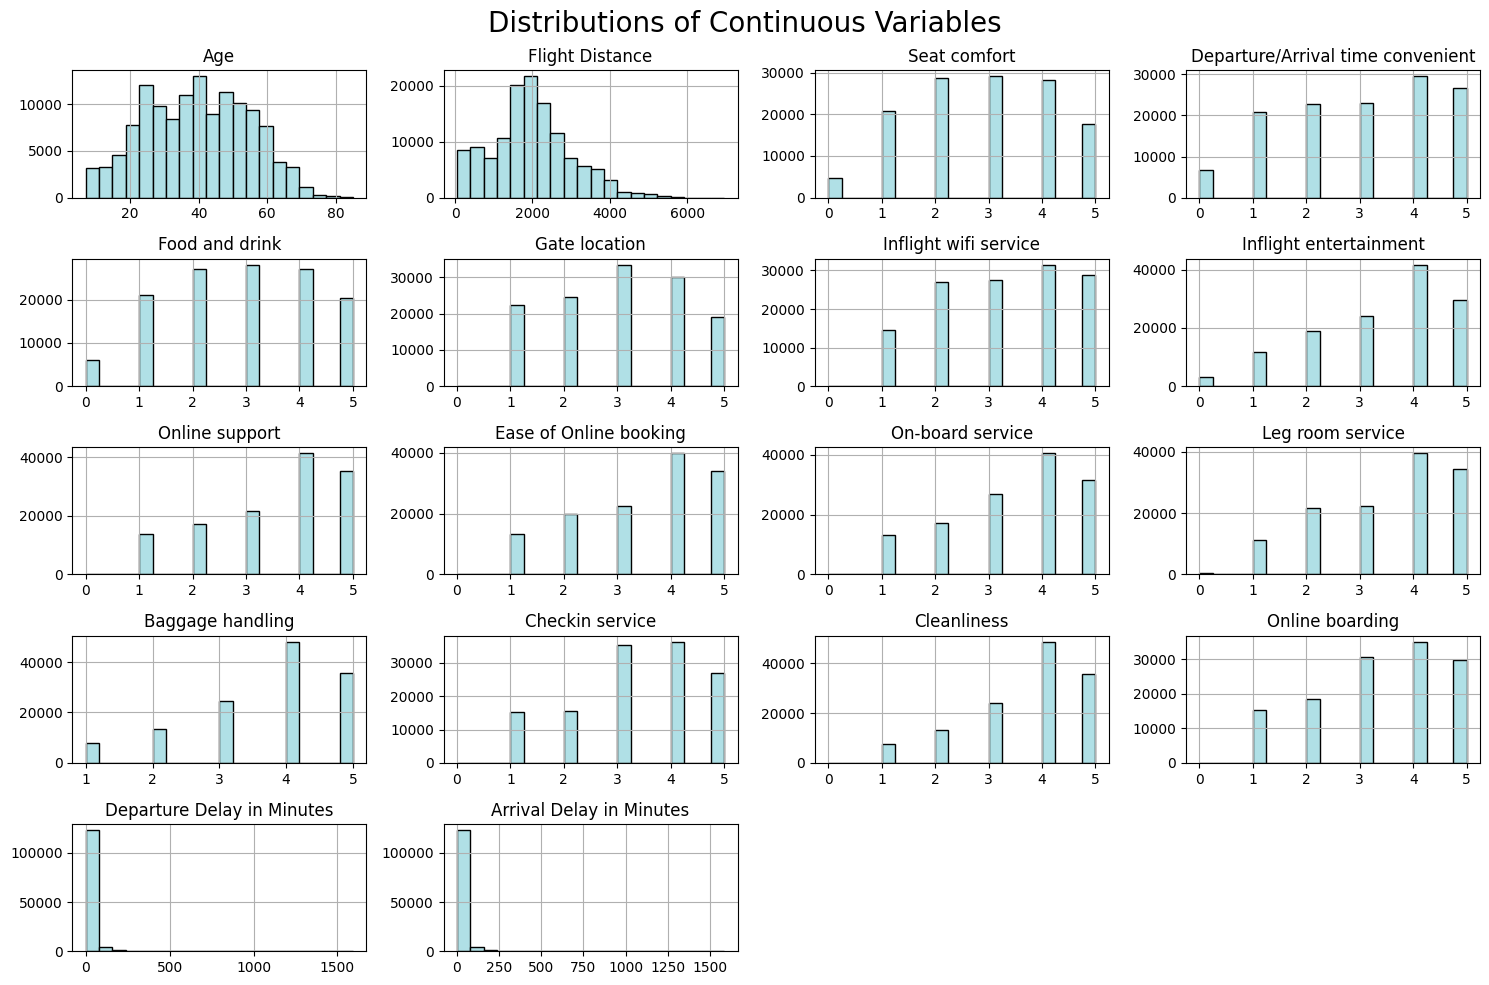

In [11]:
#Plot Histograms

continuous_cols = ['Age','Flight Distance','Seat comfort', 'Departure/Arrival time convenient','Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']

flight_df[continuous_cols].hist(bins=20, figsize=(15,10), color='powderblue', edgecolor='black')
plt.suptitle('Distributions of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.show()

# **BOXPLOT**

This reveals that most continuous variables show no extreme outliners. However, there are some variables with high outliers like Flight Distance and Delay times.Lets take at look at the Departure and Arrival Delay as they had a very high number of outliers which almost reaching 1000 minutes.

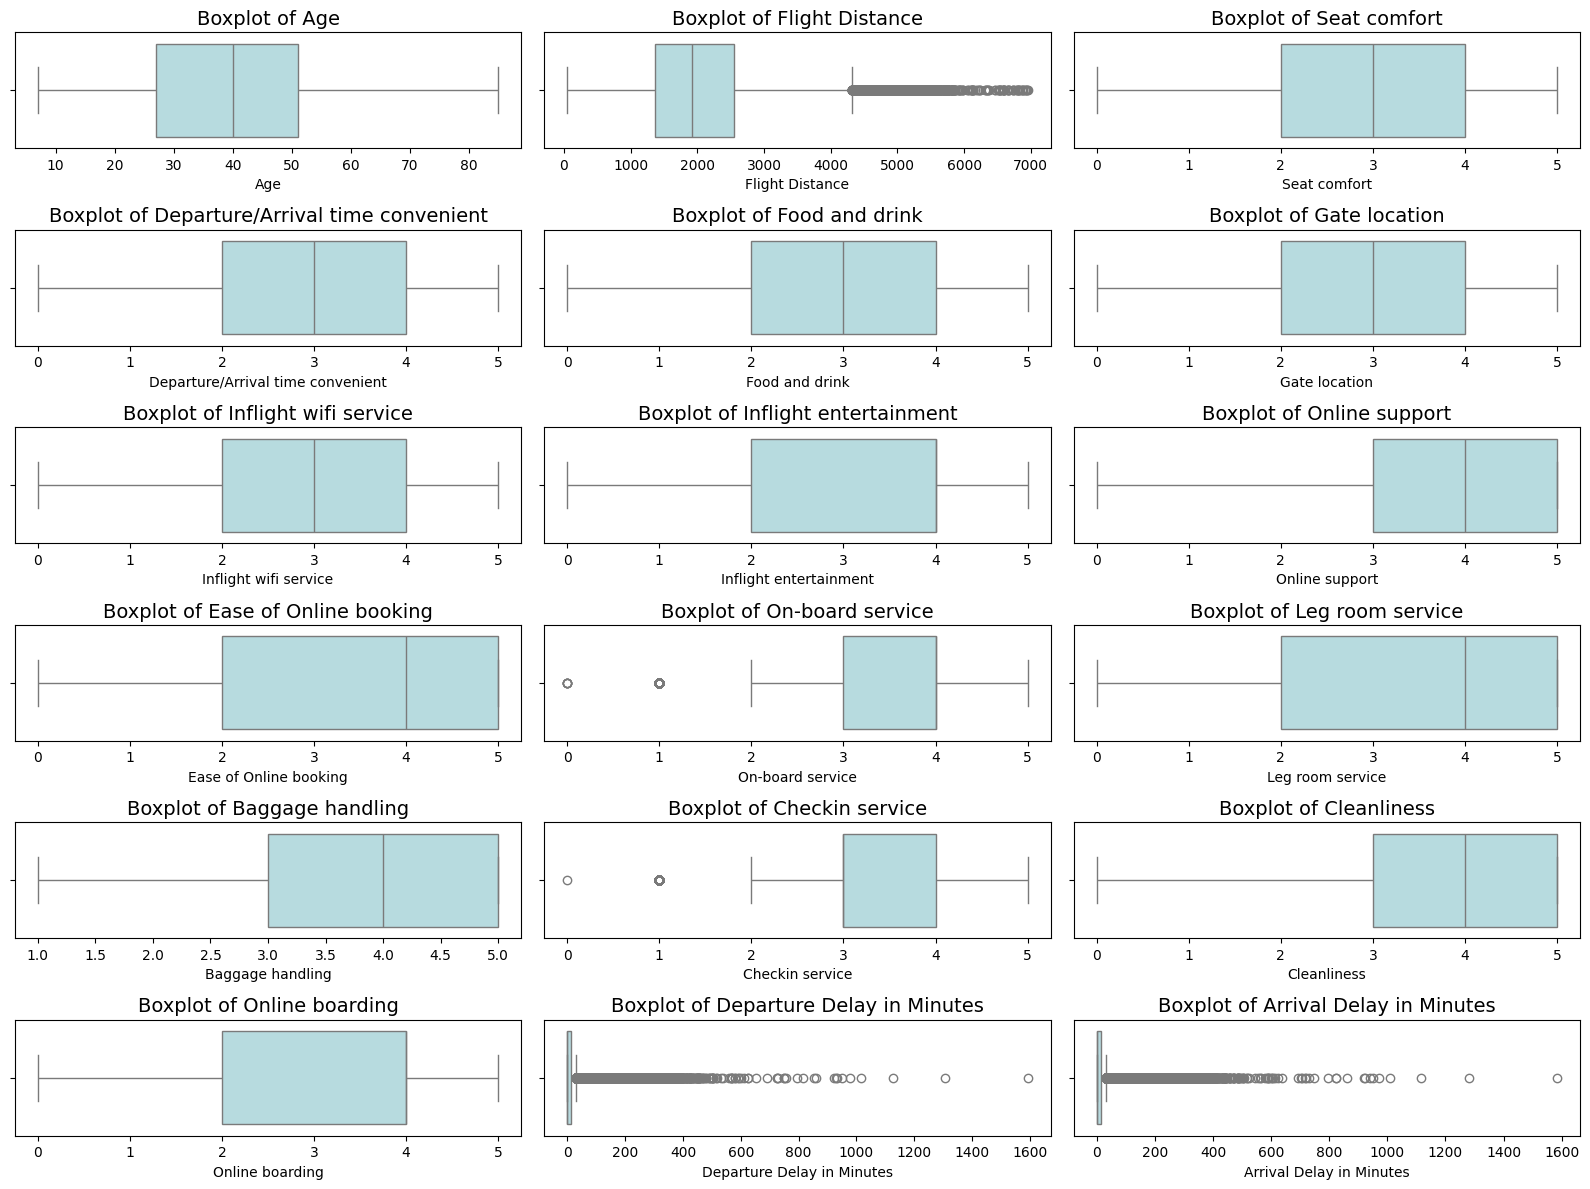

In [12]:
plt.figure(figsize=(16,12))

for i, col in enumerate(continuous_cols, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(x=flight_df[col], color='powderblue')
  plt.title(f'Boxplot of {col}', fontsize=14)
plt.tight_layout()
plt.show()

# **Categorical variables**

* Gender, Customer Type, Type of Travel, Class, satisfaction

* Compare safisfaction to Age and Class

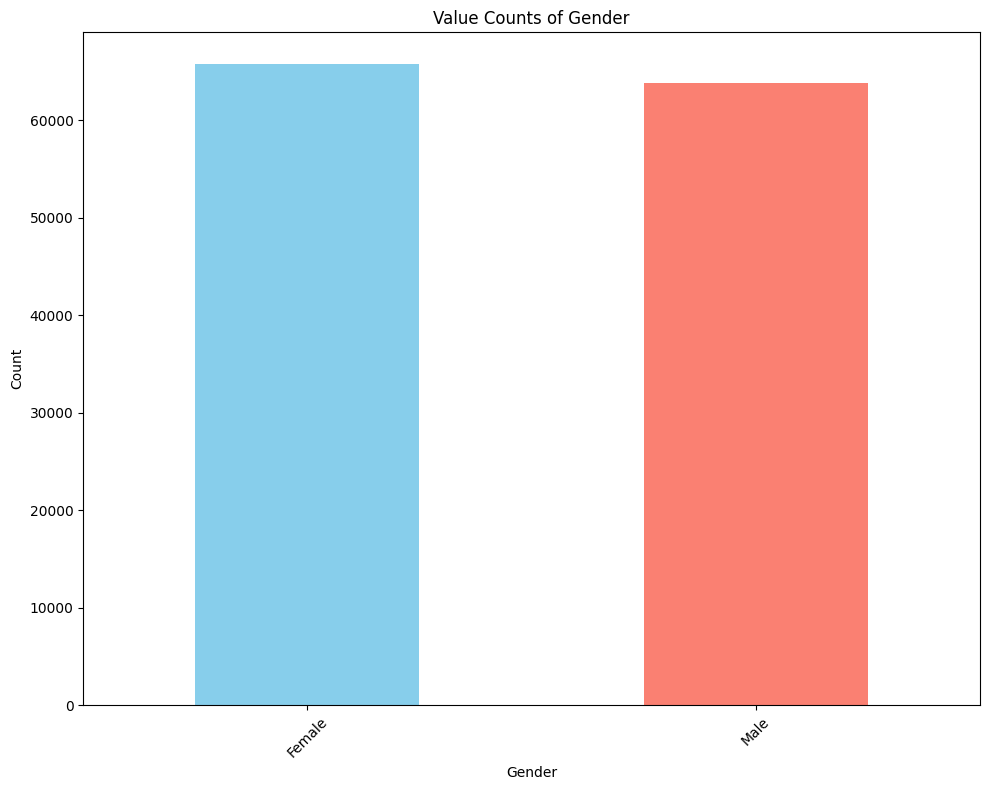

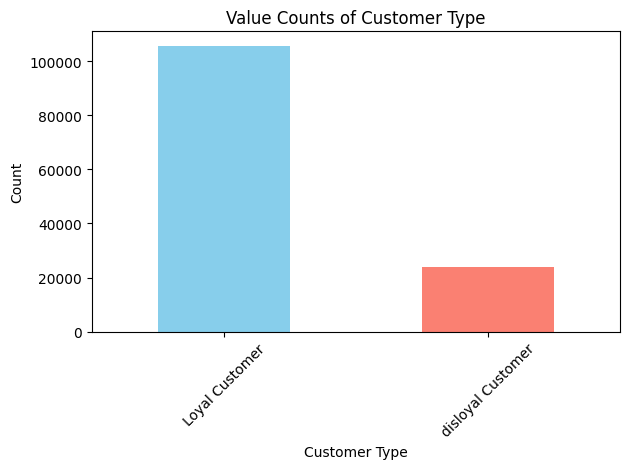

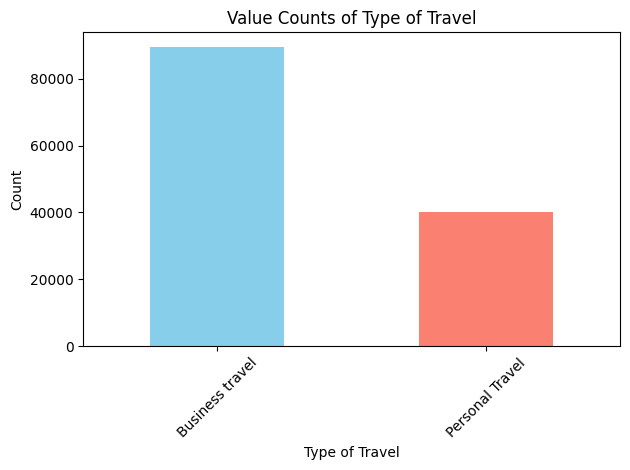

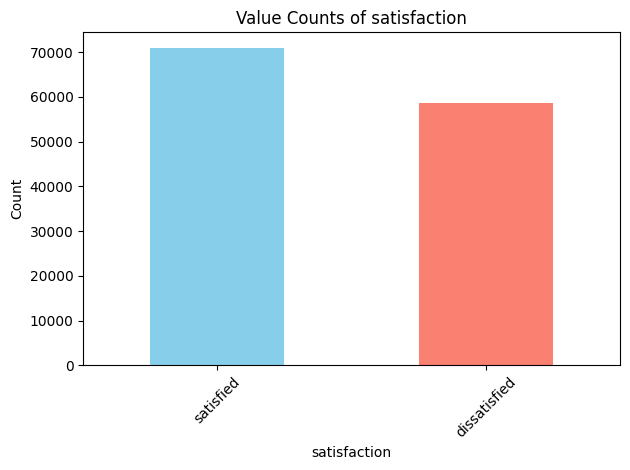

In [13]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel','satisfaction']

plt.figure(figsize=(10,8))

for col in categorical_cols:
    flight_df[col].value_counts().plot(kind='bar', color=['skyblue','Salmon'])
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


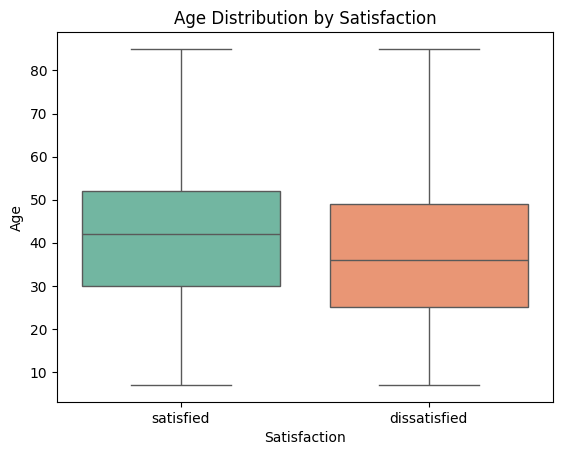

In [14]:
sns.boxplot(x='satisfaction', y='Age', data=flight_df, hue='satisfaction', palette='Set2', legend=False)
plt.title('Age Distribution by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()


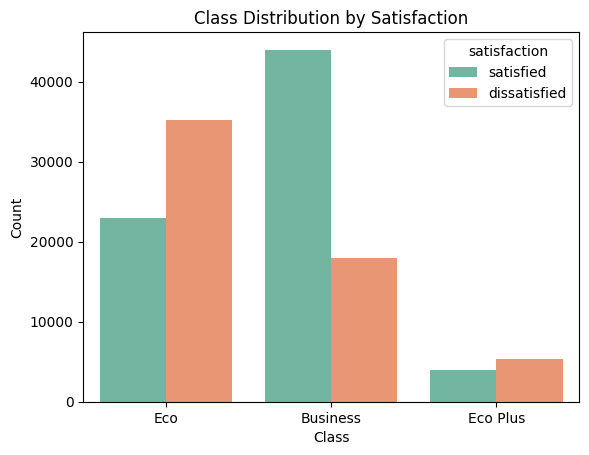

In [15]:
sns.countplot(x='Class', hue='satisfaction', data=flight_df, palette='Set2')
plt.title('Class Distribution by Satisfaction')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# **3. High-level analysis**

# **Focusing on Online Experience**

* Question 1: What are the average ratings for **[Ease of Online Booking, Online Support, Online Boarding]** among satisfied vs. dissatisfied customers?  
* Question 2: Is there a significant difference in **[Ease of Online Booking]** ratings between satisfied and dissatisfied customers?
* Question 3: Does Ease of Online Booking predict overall satisfaction?

**Analysis:**
* Q1: Pandas Query + Bar Chart (show average for both satisfied & Dissatisfied)
* Q2: T-test + Boxplot (show means + p value)
* Q3: Linear Regression (Add slop + interpret meaning)


In [16]:
# Question 1: PART 1
online_features = ['Ease of Online booking', 'Online support', 'Online boarding']

avg_ratings = flight_df.groupby('satisfaction')[online_features].mean().reset_index()

avg_ratings


,satisfaction,Ease of Online booking,Online support,Online boarding
0,dissatisfied,2.851873,2.959833,2.869653
1,satisfied,3.985031,3.983085,3.751799


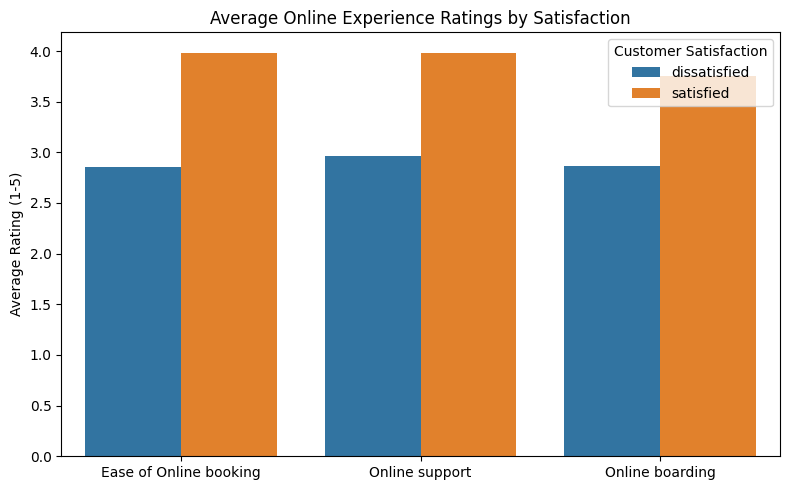

In [17]:
# Question 1: PART 2
# Reshape the data for easier plotting
avg_ratings_melted = avg_ratings.melt(id_vars='satisfaction', var_name='Feature', value_name='Average Rating')


plt.figure(figsize=(8, 5))
sns.barplot(data=avg_ratings_melted, x='Feature', y='Average Rating', hue='satisfaction')

plt.title('Average Online Experience Ratings by Satisfaction')
plt.ylabel('Average Rating (1-5)')
plt.xlabel('')
plt.legend(title='Customer Satisfaction')
plt.tight_layout()
plt.show()


In [18]:
#Question 2: Part 1 Perform t-test and compare
satisfied=flight_df[flight_df['satisfaction']=='satisfied']['Ease of Online booking']
dissatisfied=flight_df[flight_df['satisfaction']=='dissatisfied']['Ease of Online booking']

t_stat, p_value = stats.ttest_ind(satisfied, dissatisfied)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 172.3726854018023
P-value: 0.0


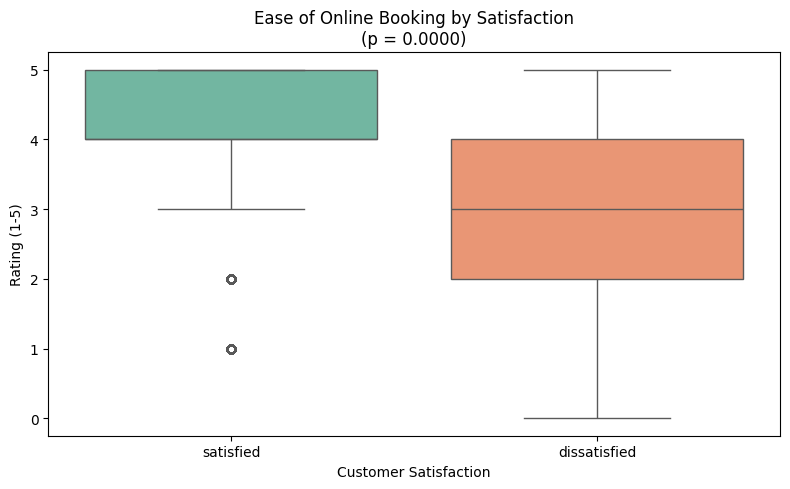

In [19]:
#Question 2: Part 2 Creating Boxplot to visualize

plt.figure(figsize=(8, 5))
sns.boxplot(x='satisfaction', y='Ease of Online booking', data=flight_df, hue='satisfaction', palette='Set2')

plt.title(f"Ease of Online Booking by Satisfaction\n(p = {p_value:.4f})")
plt.ylabel('Rating (1-5)')
plt.xlabel('Customer Satisfaction')
plt.tight_layout()
plt.show()

In [20]:
#Question 3: Part 1 (converting satisfaction to binary 1= satisfied , 0= dissatisfied), performing linear regression

flight_df['satisfaction_binary'] = flight_df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

x=flight_df['Ease of Online booking']
y=flight_df['satisfaction_binary']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")



Slope: 0.16470634235528966
Intercept: -0.024482274122348824
R-squared: 0.186638433618385
P-value: 0.0


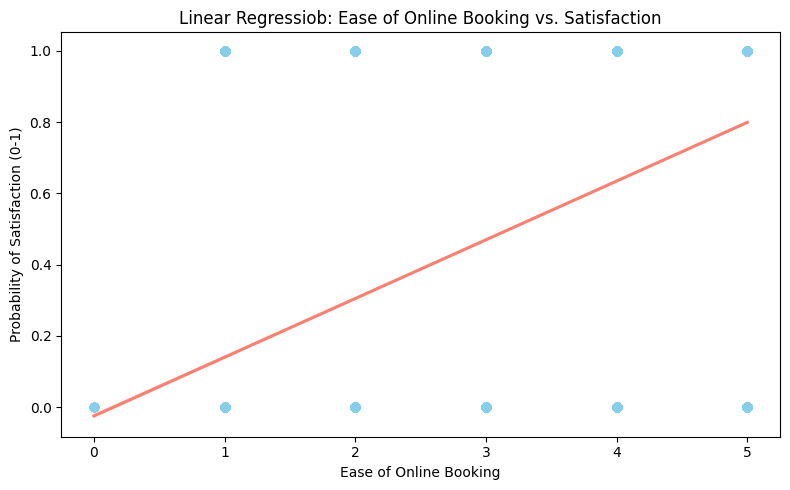

In [21]:
#Question 3: Part 2 (Visualizing results)

plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'Salmon'})

plt.title('Linear Regressiob: Ease of Online Booking vs. Satisfaction')
plt.xlabel('Ease of Online Booking')
plt.ylabel('Probability of Satisfaction (0-1)')
plt.tight_layout()
plt.show()


# **Focusing on Inflight Experience**

* Question 1:Can we group passengers into clusters based on inflight experience factors, and what do these clusters reveal about satisfaction?  
* Question 2: Is there a significant difference in Seat Comfort between Classes?
* Question 3: Do satisfied and dissatisfied passengers rate inflight features **[Wi-Fi, Food and Drink, Entertainment, etc.]** differently?

**Analysis:**
* Q1: Clustering (Use elbow method; report means and not only plot)
* Q2: T-Test (Not using regression but grouping by class)
* Q3: Means + Barplot + T-tests (Visuals include both satifaction groups)

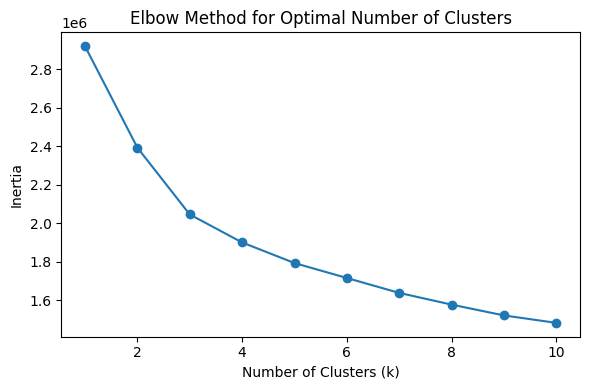

In [22]:
#Question 1: Part 1

inflight_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

inflight_df = flight_df[inflight_features].dropna()

inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(inflight_df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()



In [23]:
#Question 1: Part 2 Gettng Cluster Summary
k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
flight_df['cluster'] = kmeans.fit_predict(inflight_df)

# Add satisfaction back for cluster analysis
cluster_summary = flight_df.groupby('cluster')[inflight_features + ['satisfaction']].agg({
    **{col: 'mean' for col in inflight_features},
    'satisfaction': lambda x: (x == 'satisfied').mean()  # proportion satisfied
}).rename(columns={'satisfaction': 'Satisfaction Rate'})

# Show cluster centers with satisfaction rate
print("Cluster Summary:")
print(cluster_summary.round(2))



Cluster Summary:
         Inflight wifi service  Departure/Arrival time convenient  \
cluster                                                             
0                         3.83                               1.80   
1                         3.65                               3.97   
2                         2.24                               2.90   

         Ease of Online booking  Gate location  Food and drink  \
cluster                                                          
0                          4.23           1.97            1.66   
1                          4.09           3.77            3.97   
2                          2.05           2.98            2.61   

         Online boarding  Seat comfort  Inflight entertainment  \
cluster                                                          
0                   4.01           1.9                    3.37   
1                   3.83           4.0                    4.08   
2                   2.18           2.3    

In [24]:
from math import e
#Question 2: Part 1 perfrom t_test

ecomony = flight_df[flight_df['Class'] == 'Eco']['Seat comfort'].dropna()
business = flight_df[flight_df['Class'] == 'Business']['Seat comfort'].dropna()
ecomonyPlus= flight_df[flight_df['Class'] == 'Eco Plus']['Seat comfort'].dropna()


t_stat, p_value = stats.ttest_ind(ecomony, business)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 10.656149317450268
P-value: 1.6773209305025323e-26


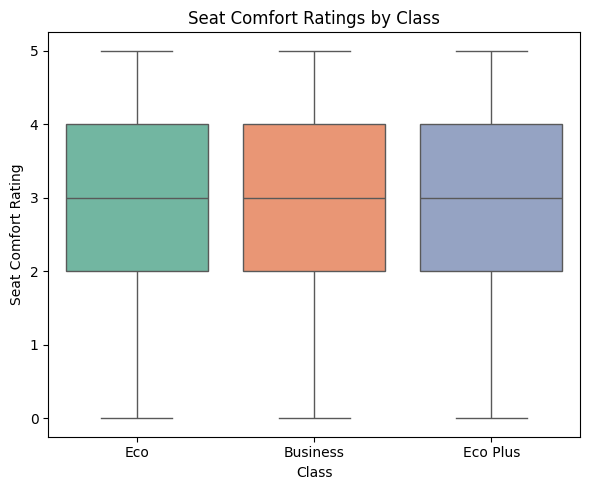

In [25]:
#Question 2: Part 2 Visualizing Results

plt.figure(figsize=(6, 5))
sns.boxplot(x='Class', y='Seat comfort', hue='Class', data=flight_df, palette='Set2')
plt.title('Seat Comfort Ratings by Class')
plt.xlabel('Class')
plt.ylabel('Seat Comfort Rating')
plt.tight_layout()
plt.show()

In [26]:
#Question 3: Part 1 Average mean

inflight_features = [ 'Seat comfort', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Cleanliness']

inflight_means = flight_df.groupby('satisfaction')[inflight_features].mean()

print("Average Ratings by satisfaction:\n", inflight_means.round(2))


Average Ratings by satisfaction:
               Seat comfort  Food and drink  Inflight wifi service  \
satisfaction                                                        
dissatisfied          2.47            2.66                   2.92   
satisfied             3.15            3.01                   3.52   

              Inflight entertainment  On-board service  Leg room service  \
satisfaction                                                               
dissatisfied                    2.61              2.97              3.05   
satisfied                       4.02              3.87              3.84   

              Cleanliness  
satisfaction               
dissatisfied         3.38  
satisfied            3.98  


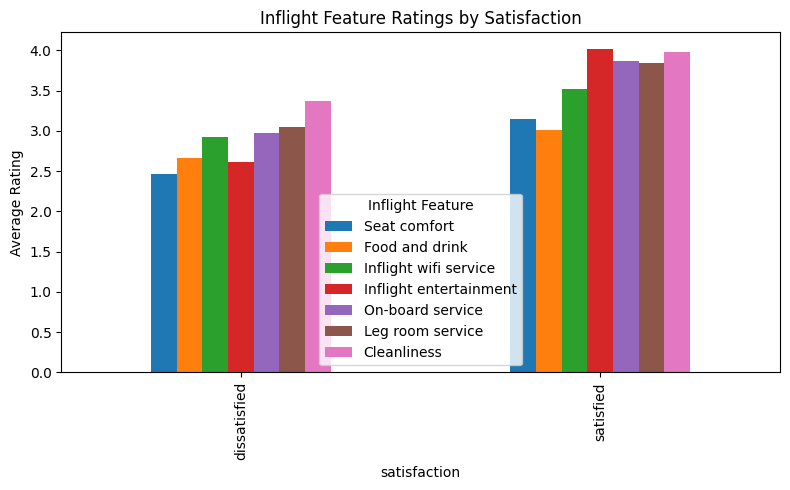

In [27]:
#Question 3: Part 2 Plotting

inflight_means.plot(kind='bar', figsize=(8, 5))
plt.title('Inflight Feature Ratings by Satisfaction')
plt.ylabel('Average Rating')
plt.legend(title='Inflight Feature')
plt.tight_layout()
plt.show()

In [28]:
#Question 3: Part 3 Run t-test
for feature in inflight_features:
    satisfaction_satisfied = flight_df[flight_df['satisfaction'] == 'satisfied'][feature].dropna()
    satisfaction_dissatisfied = flight_df[flight_df['satisfaction'] == 'dissatisfied'][feature].dropna()
    t_stat, p_value = stats.ttest_ind(satisfaction_satisfied, satisfaction_dissatisfied)
    print(f"T-statistic for {feature}: {t_stat}")
    print(f"P-value for {feature}: {p_value}")

T-statistic for Seat comfort: 89.89514732646364
P-value for Seat comfort: 0.0
T-statistic for Food and drink: 43.70413324182511
P-value for Food and drink: 0.0
T-statistic for Inflight wifi service: 83.87706189612985
P-value for Inflight wifi service: 0.0
T-statistic for Inflight entertainment: 221.01298065670562
P-value for Inflight entertainment: 0.0
T-statistic for On-board service: 135.4485690878423
P-value for On-board service: 0.0
T-statistic for Leg room service: 115.29039309329964
P-value for Leg room service: 0.0
T-statistic for Cleanliness: 96.69249044803777
P-value for Cleanliness: 0.0


# **Focusing Flight Experience**

* Question 1: Is satisfaction associated with whether a flight was delayed?
* Question 2: Do longer Flight Distances lead to longer Arrival Delays?  
* Question 3: Which class has the highest average satisfaction?

**Analysis:**
* Q1: Train/test split
* Q2: Linear regression (using clean numerical variables)
* Q3: Pandas + Visualization (using proportions, not just counts)

In [33]:
#Question 1: Part 1 create a columm for delayed flights

flight_df['was_delayed'] = flight_df['Arrival Delay in Minutes'].apply(lambda x: 1 if x > 15 else 0)

contingency_table= pd.crosstab(flight_df['satisfaction'], flight_df['was_delayed'])
contingency_table

was_delayed,0,1
satisfaction,,
dissatisfied,42830,15775
satisfied,57099,13783


Chi-squared statistic: 1016.4394442168546
P-value: 4.796806236449613e-223


<Axes: xlabel='was_delayed', ylabel='satisfaction'>

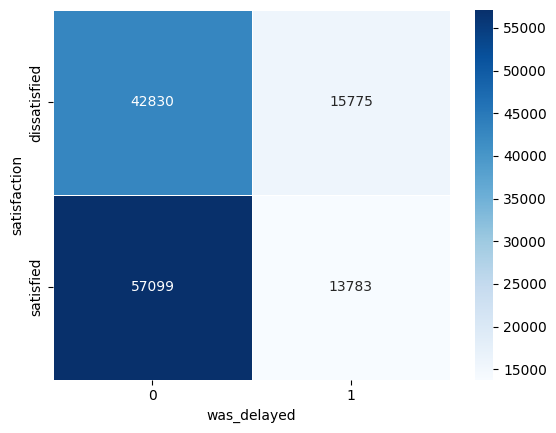

In [36]:
#Question 1: Part 2 perfrom chi -squared test

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")

sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5)

In [37]:
#Question 2: Part 1 Linear regession (relationship between Flight Distance and Arrival Delay in Minutes)

clean_flight_df= flight_df[['Flight Distance', 'Arrival Delay in Minutes']].dropna()

x=clean_flight_df['Flight Distance']
y=clean_flight_df['Arrival Delay in Minutes']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: 0.004124309272542763
Intercept: 6.920835159250249
R-squared: 0.012122694971804907
P-value: 0.0


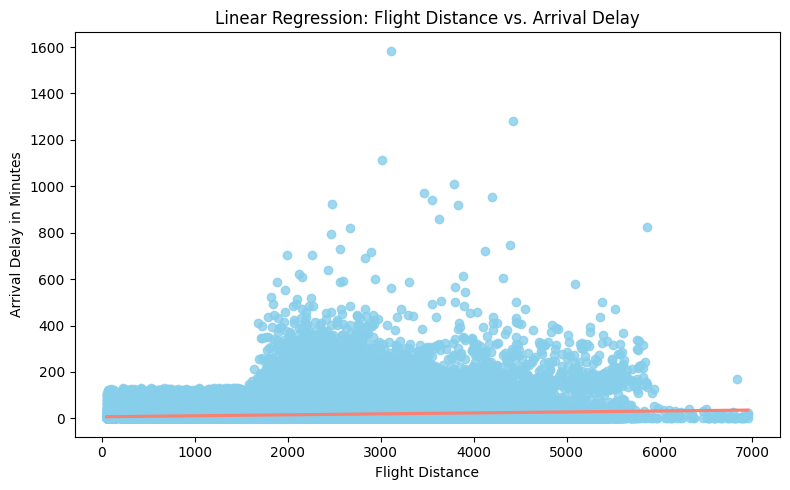

In [38]:
#Question 2: Part 2 plotting regerssion

plt.figure(figsize=(8, 5))
sns.regplot(x='Flight Distance', y='Arrival Delay in Minutes', data=clean_flight_df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'Salmon'})

plt.title('Linear Regression: Flight Distance vs. Arrival Delay')
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay in Minutes')
plt.tight_layout()
plt.show()

In [39]:
#Question 3: Class vs Satisfiaction part 1

class_satisfaction = flight_df.groupby('Class')['satisfaction'].apply(lambda x: (x == 'satisfied').mean()).reset_index()
class_satisfaction.columns = ['Class', 'Satisfaction Rate']

print("Satisfaction Rate by Class:")
print(class_satisfaction.sort_values('Satisfaction Rate', ascending=False).round(2))

Satisfaction Rate by Class:
      Class  Satisfaction Rate
0  Business               0.71
2  Eco Plus               0.43
1       Eco               0.39


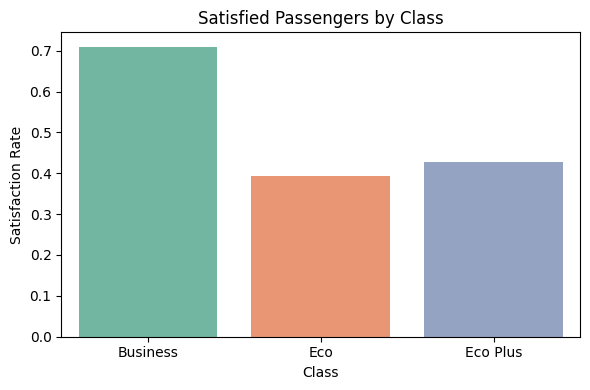

In [40]:
#Question 3: Class vs Satisfiaction part 2

plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Satisfaction Rate', data=class_satisfaction, hue='Class', palette='Set2', legend=False)
plt.title('Satisfied Passengers by Class')
plt.ylabel('Satisfaction Rate')
plt.xlabel('Class')
plt.tight_layout()
plt.show()